In [108]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report,accuracy_score

# Read the dataset

data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [109]:
# lowercase 

data['review'] = data['review'].apply(str.lower)
display(data.head())

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [110]:
# remove numbers

data['review'] = data['review'].apply(lambda x: re.sub(r'\d+', '', x))
display(data.head())


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [111]:
# remove punctuation

data['review'] = data['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
display(data.head())

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [112]:
# remove whitespaces

data['review'] = data['review'].str.split().apply(' '.join)
display(data.head())

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [113]:
# remove stopwords and join the words back into a string

data['review'] = data['review'].astype(str)
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop]
    return ' '.join(filtered_tokens)

data['review'] = data['review'].apply(remove_stopwords)
data['review'] = data['review'].str.split()


In [114]:
data

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",positive
1,"[wonderful, little, production, br, br, filmin...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[im, going, disagree, previous, comment, side,...",negative


In [115]:
# splitting the review data into train and test
data['review'] = data['review'].apply(' '.join)

# train dataset
train_reviews= data.review[:40000]

# test dataset
test_reviews= data.review[40000:]

print(train_reviews.shape)
print(test_reviews.shape)

(40000,)
(10000,)


In [116]:
# bow vectorization
vectorizer = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# transformed train reviews
cv_train_reviews=vectorizer.fit_transform(train_reviews)

# transformed test reviews
cv_test_reviews=vectorizer.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6562327)
BOW_cv_test: (10000, 6562327)


In [117]:
# labeling the sentiment data

lb=LabelBinarizer()
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [118]:
# splitting the sentiment data into train and test

test_sentiments= data.sentiment[40000:]
print(test_sentiments.shape)
train_sentiments= data.sentiment[:40000]
print(train_sentiments.shape)

(10000,)
(40000,)


In [119]:
# training the model logistic regression

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [120]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [121]:
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)


lr_bow_score : 0.5822


In [122]:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.54      0.99      0.70      4993
    Negative       0.94      0.18      0.30      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000



In [123]:
# training the model svm

svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

SGDClassifier(max_iter=500, random_state=42)


In [124]:
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [125]:
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

svm_bow_score : 0.5807


In [126]:
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

              precision    recall  f1-score   support

    Positive       0.54      0.99      0.70      4993
    Negative       0.95      0.17      0.29      5007

    accuracy                           0.58     10000
   macro avg       0.75      0.58      0.50     10000
weighted avg       0.75      0.58      0.50     10000



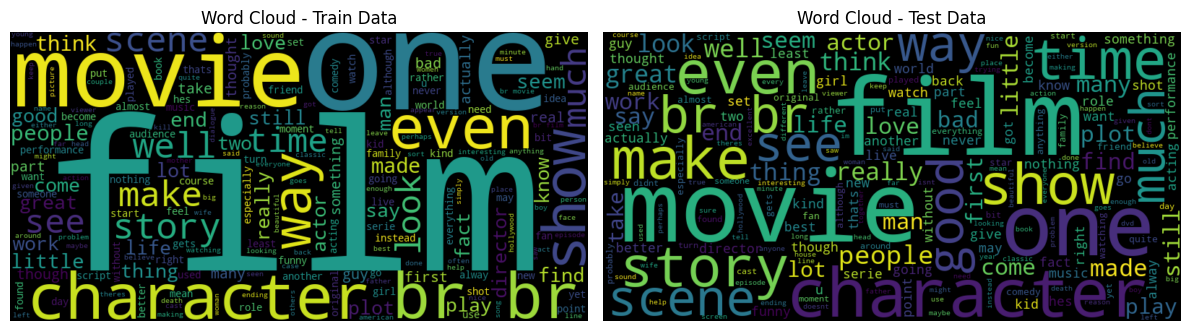

In [129]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the train and test data to text format
train_text = ' '.join(train_reviews)
test_text = ' '.join(test_reviews)

# Create a word cloud for the train data
wordcloud_train = WordCloud(width=800, height=400).generate(train_text)

# Create a word cloud for the test data
wordcloud_test = WordCloud(width=800, height=400).generate(test_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title('Word Cloud - Train Data')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.title('Word Cloud - Test Data')
plt.axis('off')

plt.tight_layout()
plt.show()
